In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
df = pd.read_csv('../data/grouped_data.csv')

In [3]:
df.head(5)

,gene_id,transcript_id,transcript_position,sevenmers,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,512,ATAACTC,0,0.00266,0.0169,0.007247,0.00599,0.004404,...,T,A,A,C,T,C,3,2,0,2
1,ENSG00000000003,ENST00000373020,689,TAAACAA,0,0.00232,0.0279,0.009868,0.00764,0.006946,...,A,A,A,C,A,A,5,1,0,1
2,ENSG00000000003,ENST00000373020,823,ATAACAA,0,0.00299,0.0196,0.007456,0.00631,0.003799,...,T,A,A,C,A,A,5,1,0,1
3,ENSG00000000003,ENST00000373020,830,ATAACCA,0,0.00266,0.0226,0.007765,0.00641,0.004869,...,T,A,A,C,C,A,4,2,0,1
4,ENSG00000000003,ENST00000373020,849,GTAACCC,0,0.00332,0.0181,0.006785,0.00598,0.003115,...,T,A,A,C,C,C,2,3,1,1


In [4]:
len(df['sevenmers'].unique())

288

In [5]:
df.shape

(121838, 70)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gene_id                 121838 non-null  object 
 1   transcript_id           121838 non-null  object 
 2   transcript_position     121838 non-null  int64  
 3   sevenmers               121838 non-null  object 
 4   label                   121838 non-null  int64  
 5   dwelling_time_1_min     121838 non-null  float64
 6   dwelling_time_1_max     121838 non-null  float64
 7   dwelling_time_1_mean    121838 non-null  float64
 8   dwelling_time_1_median  121838 non-null  float64
 9   dwelling_time_1_std     121838 non-null  float64
 10  dwelling_time_1_skew    121838 non-null  float64
 11  sd_current_1_min        121838 non-null  float64
 12  sd_current_1_max        121838 non-null  float64
 13  sd_current_1_mean       121838 non-null  float64
 14  sd_current_1_median 

In [7]:
df.describe()

,transcript_position,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,...,mean_current_3_min,mean_current_3_max,mean_current_3_mean,mean_current_3_median,mean_current_3_std,mean_current_3_skew,count_A,count_C,count_G,count_T
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,1615.868407,0.044937,0.002312,0.026324,0.008108,0.006864,0.004942,1.556378,1.757194,9.515576,...,80.228664,92.647447,86.203293,86.146489,2.476069,0.126036,2.805964,1.697008,1.370599,1.126430
std,1395.137528,0.207166,0.000476,0.009820,0.001787,0.001673,0.001523,0.688275,0.878632,4.981098,...,5.340230,5.111289,4.937330,5.035057,0.736107,0.858432,1.143660,0.763898,0.930549,0.931224
min,3.000000,0.000000,0.001660,0.005980,0.003616,0.002660,0.000977,-0.617264,0.094000,1.790000,...,61.000000,76.200000,72.231429,71.700000,0.531099,-4.455771,1.000000,1.000000,0.000000,0.000000
25%,673.000000,0.000000,0.001990,0.019300,0.006799,0.005640,0.003848,1.095084,1.130000,6.370000,...,76.000000,88.800000,82.050397,81.900000,1.960244,-0.363994,2.000000,1.000000,1.000000,0.000000
50%,1256.000000,0.000000,0.002320,0.024600,0.007760,0.006515,0.004710,1.474776,1.560000,9.360000,...,80.200000,92.800000,86.500000,86.500000,2.382496,0.143553,3.000000,2.000000,1.000000,1.000000
75%,2139.000000,0.000000,0.002320,0.031300,0.009101,0.007730,0.005791,1.910991,2.170000,12.100000,...,84.400000,96.500000,89.997368,90.000000,2.886672,0.632355,4.000000,2.000000,2.000000,2.000000
max,18730.000000,1.000000,0.009890,0.120000,0.019119,0.017900,0.018952,8.132003,8.230000,206.000000,...,95.500000,143.000000,105.773134,100.000000,19.888538,9.193026,6.000000,4.000000,4.000000,4.000000


In [8]:
# Get non-numerical features.
non_num_cols = list(set(df.columns) - set(df.describe().columns))
print('Non-numerical features: ', non_num_cols)

Non-numerical features:  ['order_4', 'gene_id', 'order_3', 'order_2', 'order_7', 'sevenmers', 'order_6', 'transcript_id', 'order_1', 'order_5']


In [9]:
#Assign appropriate data type to categorical variables.
df[non_num_cols] = df[non_num_cols].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   gene_id                 121838 non-null  category
 1   transcript_id           121838 non-null  category
 2   transcript_position     121838 non-null  int64   
 3   sevenmers               121838 non-null  category
 4   label                   121838 non-null  int64   
 5   dwelling_time_1_min     121838 non-null  float64 
 6   dwelling_time_1_max     121838 non-null  float64 
 7   dwelling_time_1_mean    121838 non-null  float64 
 8   dwelling_time_1_median  121838 non-null  float64 
 9   dwelling_time_1_std     121838 non-null  float64 
 10  dwelling_time_1_skew    121838 non-null  float64 
 11  sd_current_1_min        121838 non-null  float64 
 12  sd_current_1_max        121838 non-null  float64 
 13  sd_current_1_mean       121838 non-null  float64 
 14  sd_c

# Train-test split

In [11]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42)
split = splitter.split(df, groups = df['gene_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [12]:
y_train = train['label']
X_train = train.drop(['label', 'sevenmers'], axis = 1)

y_test = test['label']
X_test = test.drop(['label', 'sevenmers'], axis = 1)

In [13]:
train_geneids = train['gene_id'].unique()
test_geneids = test['gene_id'].unique()

In [14]:
# check if any gene id in train set is present in test set
np.in1d(train_geneids, test_geneids).any()

False

# Drop gene_id and transcript_id columns

In [15]:
X_train_ids = X_train[['gene_id', 'transcript_id']]
X_train_clean = X_train.drop(columns=['gene_id', 'transcript_id'])

In [16]:
X_train_ids.shape

(98006, 2)

In [17]:
X_train_clean.shape

(98006, 66)

In [18]:
X_test_ids = X_test[['gene_id', 'transcript_id']]
X_test_clean = X_test.drop(columns=['gene_id', 'transcript_id'])

# Oversampling on train data

In [19]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 93715, 1: 4291})


<AxesSubplot:>

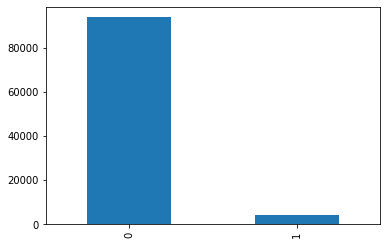

In [20]:
y_train.value_counts().plot(kind="bar")

In [21]:
y_train.value_counts()/len(y_train)

0    0.956217
1    0.043783
Name: label, dtype: float64

95.6% of training data consists of data with no m6a modification. Class imbalance!

In [22]:
# create list with categorical features' names
nonum_cols_names = ['order_1', 'order_2', 'order_3', 'order_4', 'order_5', 'order_6', 'order_7']

# # create list with numerical features' names
# num_cols_names = ['dwelling_time_min', 'dwelling_time_max', 'dwelling_time_mean', 'dwelling_time_median', 'dwelling_time_std', 
#                   'dwelling_time_skew', 'sd_current_min', 'sd_current_max', 'sd_current_mean', 'sd_current_median', 'sd_current_std',
#                   'sd_current_skew', 'mean_current_min', 'mean_current_max', 'mean_current_mean', 'mean_current_median', 'mean_current_std',
#                   'mean_current_skew', 'count_A', 'count_C', 'count_G', 'count_T']

In [23]:
cat_col_index = [df.columns.get_loc(c) for c in nonum_cols_names if c in df]

In [24]:
X_train_clean.head(5)

,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,sd_current_1_mean,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
13,105,0.00332,0.0288,0.012129,0.009860,0.006529,1.014144,4.86,13.90,8.571563,...,G,A,A,C,A,A,5,1,1,0
14,147,0.00217,0.0222,0.008839,0.007625,0.005117,0.941203,3.77,13.40,7.826765,...,G,A,A,C,C,T,3,2,1,1
15,242,0.00291,0.0214,0.006908,0.005460,0.004029,1.967847,2.62,12.40,7.989333,...,G,A,A,C,A,A,4,1,2,0
16,259,0.00427,0.0218,0.010699,0.008300,0.005605,0.763647,4.97,11.40,8.548000,...,G,A,A,C,A,G,3,1,2,1
17,285,0.00232,0.0159,0.005876,0.004980,0.003735,1.609819,2.19,6.72,4.641600,...,A,G,A,C,A,G,3,2,2,0


In [25]:
cat_col_index

[59, 60, 61, 62, 63, 64, 65]

In [26]:
# define oversampling strategy so that ratio of minority samples to majority samples is 1:2
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)

In [27]:
X_train_over, y_train_over = oversample.fit_resample(X_train_clean, y_train)

In [28]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 93715, 1: 46857})


In [29]:
y_train_over.value_counts()/len(y_train_over)

0    0.666669
1    0.333331
Name: label, dtype: float64

<AxesSubplot:>

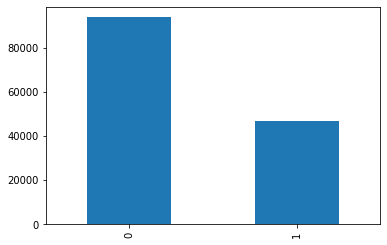

In [30]:
y_train_over.value_counts().plot(kind="bar")

In [31]:
# define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
under = RandomUnderSampler(sampling_strategy=0.75)
# fit and apply the transform
X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)

In [32]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0: 62476, 1: 46857})


In [33]:
y_train_under.value_counts()/len(y_train_under)

0    0.571429
1    0.428571
Name: label, dtype: float64

<AxesSubplot:>

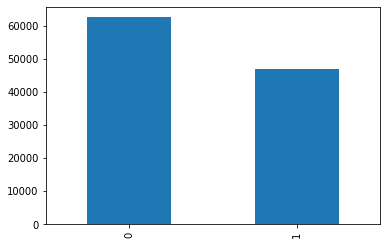

In [34]:
y_train_under.value_counts().plot(kind="bar")

In [35]:
X_train_under.head(5)

,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,sd_current_1_mean,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,758,0.00232,0.0249,0.006768,0.00488,0.004793,1.945592,2.59,13.0,5.121897,...,A,G,A,C,A,G,3,2,2,0
1,1019,0.00270,0.0329,0.007921,0.00671,0.005329,2.685181,3.02,10.6,7.060638,...,G,A,A,C,T,C,2,3,1,1
2,781,0.00199,0.0205,0.006974,0.00564,0.004159,1.372405,2.15,12.2,6.462059,...,A,G,A,C,A,G,3,2,2,0
3,1853,0.00232,0.0309,0.010024,0.00889,0.005466,1.170006,2.11,15.4,4.907430,...,T,G,A,C,T,G,1,1,3,2
4,764,0.00166,0.0357,0.012731,0.01180,0.006453,0.922937,1.11,14.1,4.886586,...,G,G,A,C,T,A,2,1,3,1


In [36]:
y_train_under.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [37]:
X_train_final = X_train_under.copy()
y_train_final = y_train_under.copy()

X_test_final = X_test_clean.copy()
y_test_final = y_test.copy()

In [38]:
X_train_final.to_csv('X_train_final.csv')
X_test_final.to_csv('X_test_final.csv')

y_train_final.to_csv('y_train_final.csv')
y_test_final.to_csv('y_test_final.csv')

# For Future Usage

In [39]:
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# split dataset into X y train test, based on gene_id
# input: df, split_size
# output: train df, test df
def split(df, split_size=0.2):
    splitter = GroupShuffleSplit(test_size=split_size, n_splits=1, random_state=42)
    split = splitter.split(df, groups=df['gene_id'])
    train_inds, test_inds = next(split)
    train = df.iloc[train_inds]
    test = df.iloc[test_inds]
    
    y_train = train['label']
    X_train = train.drop(['label', 'sevenmers'], axis = 1)
    y_test = test['label']
    X_test = test.drop(['label', 'sevenmers'], axis = 1)
    
    return X_train, y_train, X_test, y_test

# oversample and undersample such that ratio of minority to majority samples becomes 3:4
# input: df, df (X_train, y_train)
# output: df, df (resampled version)
def resample(X_train, y_train):
    # define oversampling strategy so that ratio of minority samples to majority samples is 1:2
    oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
    
    # define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
    under = RandomUnderSampler(sampling_strategy=0.75)
    X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)
    return X_train_under, y_train_under

df = pd.read_csv('../data/grouped_data.csv')
X_train, y_train, X_test, y_test = split(df)
X_train, y_train = resample(X_train, y_train)

# OR
# X_train = pd.read_csv('../data/X_train_final.csv')
# y_train = pd.read_csv('../data/y_train_final.csv')
# X_test = pd.read_csv('../data/X_test_final.csv')
# y_test = pd.read_csv('../data/y_test_final.csv')